# A PICTURE IS WORTH A THOUSAND WORDS

In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import annabel as anna
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
layers = tf.keras.layers

In [4]:
files = np.array(["output_digi_HDF_2Body_2T.h5",
        "output_digi_HDF_2Body.h5", "output_digi_HDF_3Body.h5"])
two = h5py.File(files[1])
three = h5py.File(files[2])
names2 = list(two.keys())
names3 = list(three.keys())

In [6]:
first = 1001
last = 1021
inc = 2
event_set = range(first,last,inc)

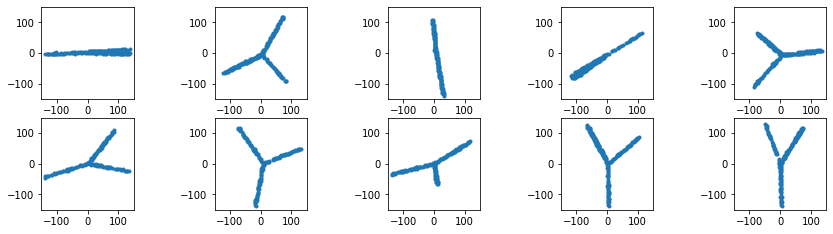

In [10]:
#plotting xy projections of events
plt.figure(figsize=(15,20))
for id in event_set:
    event = three["Event_["+str(id)+"]"]
    evt_data = np.zeros((len(event[:]),6))
    for i,e in enumerate(event):
        instant = np.array(list(e))
        evt_data[i] = np.array(instant)      
    x = evt_data[:,0]
    y = evt_data[:,1]
    plt.subplot((last-first)//inc, 5, (id-first)//inc+1)
    plt.plot(x,y,'.')
    plt.xlim(-150,150)
    #plt.xlabel("x position")
    plt.ylim(-150,150)
    #plt.ylabel("y position")
    #plt.title("x vs y position")
    plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [11]:
first = 1001
last = 1006
inc = 2
event_set = range(first,last,inc)

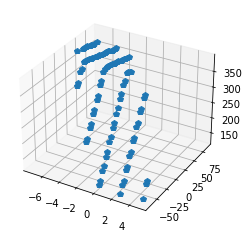

In [12]:
#plotting 3-D representations of events
ax = plt.axes(projection='3d')
for id in event_set:
    event = two["Event_["+str(id)+"]"]
    evt_data = np.zeros((len(event[:]),6))
    for i,e in enumerate(event):
        instant = np.array(list(e))
        evt_data[i] = np.array(instant)
    x = evt_data[:,0]
    y = evt_data[:,1]
    z = evt_data[:,2]
    ax.plot3D(x,y,z,"p")
    plt.show()     #remove tab if you want all graphed together

In [5]:
min2, max2 = anna.get_max_min(two)
min3, max3 = anna.get_max_min(three)
#anna.makeImageDataset(two, min2, max2, True)
#anna.makeImageDataset(three, min3, max3, True)

[-250.32000732 -192.86575317   40.        ] [250.32003784 269.37756348 998.        ]


AttributeError: 'NoneType' object has no attribute 'keys'

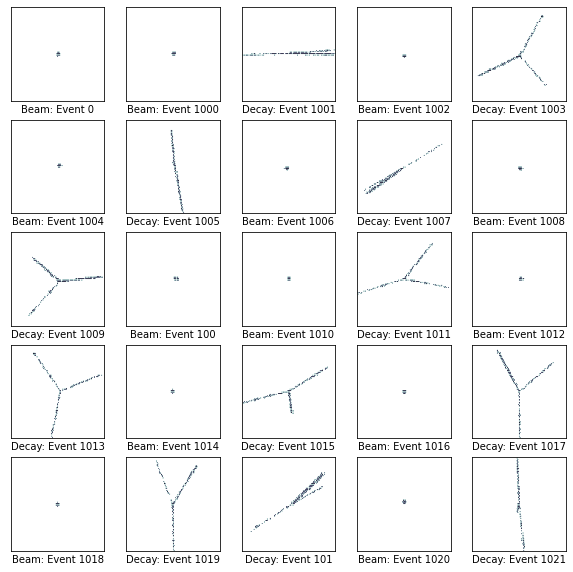

<Figure size 720x720 with 0 Axes>

In [16]:
print(min2,max2)
anna.plotData(anna.imageMatrix(three, min3, max3, True))

In [90]:
imgs2 = h5py.File('imgs2', 'r')
imgs3 = h5py.File('imgs3', 'r')
anna.combineDatasets(imgs2, imgs3)

Enter file name (.h5) for new dataset:  allimgs
